In [ ]:
pip install spacepy

In [401]:
import numpy as np
import pandas as pd
import math
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [487]:
data = pd.read_csv("2022.csv", delimiter=',',header=None, na_values='0')

In [488]:
datac=data.iloc[:,0:4]

In [489]:
datac.columns = ['Fecha_Hora','Bx', 'By', 'Bz']
datac

,Fecha_Hora,Bx,By,Bz
0,2022-01-01 00:00:00,-6.17170,1.124830,-4.902280
1,2022-01-01 00:01:00,-6.28883,1.233130,-4.790010
2,2022-01-01 00:02:00,-6.11811,0.871923,-5.128300
3,2022-01-01 00:03:00,-6.28704,1.249870,-4.766400
4,2022-01-01 00:04:00,-6.42125,1.171560,-4.532300
...,...,...,...,...
525595,2022-12-31 23:55:00,-1.95967,4.958450,-1.202990
525596,2022-12-31 23:56:00,-1.82694,4.650830,0.351759
525597,2022-12-31 23:57:00,-3.77304,3.876940,0.440392
525598,2022-12-31 23:58:00,-3.18466,4.436660,1.084170


In [490]:
componentes_H = []

# Constantes para la conversión de coordenadas
theta = np.radians(180)  # Ángulo de rotación
R = np.array([[np.cos(theta), -np.sin(theta), 0],
              [np.sin(theta), np.cos(theta), 0],
              [0, 0, 1]])

# Iterar a través de las filas de datos
for index, fila in datac.iterrows():
    Bx, By, Bz = pd.to_numeric(fila['Bx'], errors='coerce'), pd.to_numeric(fila['By'], errors='coerce'), pd.to_numeric(fila['Bz'], errors='coerce')

    # Comprobar si hay valores faltantes (NaN) en las componentes
    if np.isnan(Bx) or np.isnan(By) or np.isnan(Bz):
        # Si hay valores faltantes, asignar NaN a la componente H
        H = np.nan
    else:
        # Crear una matriz de coordenadas GSE
        coord_GSE = np.array([Bx, By, Bz])

        # Aplicar la rotación para convertir a coordenadas GSM
        coord_GSM = np.dot(R, coord_GSE)

        # Calcular la componente H como la proyección horizontal en el plano XY
        H = np.sqrt(coord_GSM[0]**2 + coord_GSM[1]**2)

    # Agregar el valor de H calculado a la lista
    componentes_H.append(H)

# Convertir la lista de componentes H en una Serie de pandas y agregarla al DataFrame original
datac['Componente_H'] = pd.Series(componentes_H, index=datac.index)


In [491]:
datac

,Fecha_Hora,Bx,By,Bz,Componente_H
0,2022-01-01 00:00:00,-6.17170,1.124830,-4.902280,6.273366
1,2022-01-01 00:01:00,-6.28883,1.233130,-4.790010,6.408587
2,2022-01-01 00:02:00,-6.11811,0.871923,-5.128300,6.179929
3,2022-01-01 00:03:00,-6.28704,1.249870,-4.766400,6.410074
4,2022-01-01 00:04:00,-6.42125,1.171560,-4.532300,6.527251
...,...,...,...,...,...
525595,2022-12-31 23:55:00,-1.95967,4.958450,-1.202990,5.331654
525596,2022-12-31 23:56:00,-1.82694,4.650830,0.351759,4.996792
525597,2022-12-31 23:57:00,-3.77304,3.876940,0.440392,5.409852
525598,2022-12-31 23:58:00,-3.18466,4.436660,1.084170,5.461320


In [492]:
Horas=3
inter=Horas*60
gruposh=[]
for i in range(round(len(datac)/inter)):
  grup = datac.iloc[i * inter: (i + 1) * inter,4:5]
  promedio_grupo = grup.std()  # Calcula el promedio para el grupo
  gruposh.append(promedio_grupo)

In [493]:
datak=data.iloc[:,4:]
prom= datak.mean(axis=1)
promedios = pd.DataFrame({'Promedio': prom})
promedios

,Promedio
0,265.670993
1,265.977963
2,270.908997
3,269.830707
4,266.929382
...,...
525595,254.163268
525596,255.668029
525597,246.620515
525598,251.920913


In [501]:
Horas = 3


# Supongamos que tienes un DataFrame llamado df
# y deseas calcular el promedio en intervalos de 3 filas
intervalo = Horas * 60

# Calcula el número de intervalos completos
num_intervalos = len(datak) // intervalo

# Crea una lista para almacenar los promedios
flujo = []

# Calcula los promedios en cada intervalo y almacénalos en la lista
for i in range(num_intervalos):
    inicio = i * intervalo
    fin = (i + 1) * intervalo
    promedio_intervalo = promedios['Promedio'].iloc[inicio:fin].mean()
    flujo.append(promedio_intervalo)

# Crea un nuevo DataFrame con los promedios
df_promedios = pd.DataFrame({'Flujo': flujo})

# Imprime el nuevo DataFrame
df_promedios



,Flujo
0,262.079675
1,248.303402
2,250.602309
3,254.732833
4,253.993475
...,...
2915,248.517595
2916,257.371181
2917,257.212286
2918,252.859441


In [502]:
fechaf = datac.iloc[:,:1]
fechaf

,Fecha_Hora
0,2022-01-01 00:00:00
1,2022-01-01 00:01:00
2,2022-01-01 00:02:00
3,2022-01-01 00:03:00
4,2022-01-01 00:04:00
...,...
525595,2022-12-31 23:55:00
525596,2022-12-31 23:56:00
525597,2022-12-31 23:57:00
525598,2022-12-31 23:58:00


In [503]:
inter=Horas*60
fecha=[]
for i in range(round(len(datac)/inter)):
  gru = fechaf[i*inter:i*inter+1].squeeze().replace(r'^Fecha_Hora \d+ ', '')
  fecha.append(gru)

In [504]:
Dataf=pd.DataFrame({'Fecha': fecha})
Dataf

,Fecha
0,2022-01-01 00:00:00
1,2022-01-01 03:00:00
2,2022-01-01 06:00:00
3,2022-01-01 09:00:00
4,2022-01-01 12:00:00
...,...
2915,2022-12-31 09:00:00
2916,2022-12-31 12:00:00
2917,2022-12-31 15:00:00
2918,2022-12-31 18:00:00


In [505]:
gruposhh= pd.DataFrame(gruposh)

In [538]:
def calcular_kp(desviacion_estandar):
    tabla_conversion = {
        0.0: 0,
        0.509340: 1,
        1.2789: 2,
        1.531997: 3,
        1.817033: 4,
        3.370304: 5,
        4.0: 6,
        5.0: 7,
        6.0: 8,
        9.0: 9,
    }

    desviaciones = list(tabla_conversion.keys())
    kp_valores = list(tabla_conversion.values())

    # Realiza interpolación lineal
    kp_interpolado = np.interp(desviacion_estandar, desviaciones, kp_valores)
    return kp_interpolado

# Aplica la función de cálculo de Kp a la serie de desviaciones estándar y crea una columna para el índice Kp
gruposhh["Kp"] = gruposhh.apply(calcular_kp)


ValueError: ignored

In [522]:
gruposhh['Fecha'] = Dataf
gruposhh['Flujos']=df_promedios

In [523]:
gruposhh

,Componente_H,Kp,Fecha,Flujos
0,1.504479,2.891274,2022-01-01 00:00:00,262.079675
1,1.817033,4.000000,2022-01-01 03:00:00,248.303402
2,1.257566,1.972278,2022-01-01 06:00:00,250.602309
3,0.472949,0.928553,2022-01-01 09:00:00,254.732833
4,0.239686,0.470582,2022-01-01 12:00:00,253.993475
...,...,...,...,...
2915,0.941031,1.560958,2022-12-31 09:00:00,248.517595
2916,1.411542,2.524074,2022-12-31 12:00:00,257.371181
2917,1.113250,1.784747,2022-12-31 15:00:00,257.212286
2918,0.972372,1.601684,2022-12-31 18:00:00,252.859441


In [524]:
gruposhh['Kp'].fillna(gruposhh['Kp'].mean(), inplace=True)

In [525]:
gruposhh

,Componente_H,Kp,Fecha,Flujos
0,1.504479,2.891274,2022-01-01 00:00:00,262.079675
1,1.817033,4.000000,2022-01-01 03:00:00,248.303402
2,1.257566,1.972278,2022-01-01 06:00:00,250.602309
3,0.472949,0.928553,2022-01-01 09:00:00,254.732833
4,0.239686,0.470582,2022-01-01 12:00:00,253.993475
...,...,...,...,...
2915,0.941031,1.560958,2022-12-31 09:00:00,248.517595
2916,1.411542,2.524074,2022-12-31 12:00:00,257.371181
2917,1.113250,1.784747,2022-12-31 15:00:00,257.212286
2918,0.972372,1.601684,2022-12-31 18:00:00,252.859441


In [526]:
filas_con_nulos = gruposhh.isnull().any(axis=1)
gruposhh = gruposhh.fillna(gruposhh.mean())

<ipython-input-526-539680f44b9d>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  gruposhh = gruposhh.fillna(gruposhh.mean())


In [ ]:
print(gruposhh[filas_con_nulos])

In [533]:
gruposhh


,Componente_H,Kp,Fecha,Flujos
0,1.504479,2.891274,2022-01-01 00:00:00,262.079675
1,1.817033,4.000000,2022-01-01 03:00:00,248.303402
2,1.257566,1.972278,2022-01-01 06:00:00,250.602309
3,0.472949,0.928553,2022-01-01 09:00:00,254.732833
4,0.239686,0.470582,2022-01-01 12:00:00,253.993475
...,...,...,...,...
2915,0.941031,1.560958,2022-12-31 09:00:00,248.517595
2916,1.411542,2.524074,2022-12-31 12:00:00,257.371181
2917,1.113250,1.784747,2022-12-31 15:00:00,257.212286
2918,0.972372,1.601684,2022-12-31 18:00:00,252.859441


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(gruposhh, *['Componente_H'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(gruposhh, *['Kp'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(gruposhh, *['Flujos'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(gruposhh, *['Componente_H'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(gruposhh, *['Kp'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(gruposhh, *['Flujos'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(gruposhh, *[[['Componente_H', 'Kp'], ['Kp', 'Flujos']]], **{})
chart

Epoch 1/64
18/18 [==============================] - 1s 15ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/64
18/18 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/64
18/18 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/64
18/18 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/64
18/18 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/64
18/18 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/64
18/18 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epo

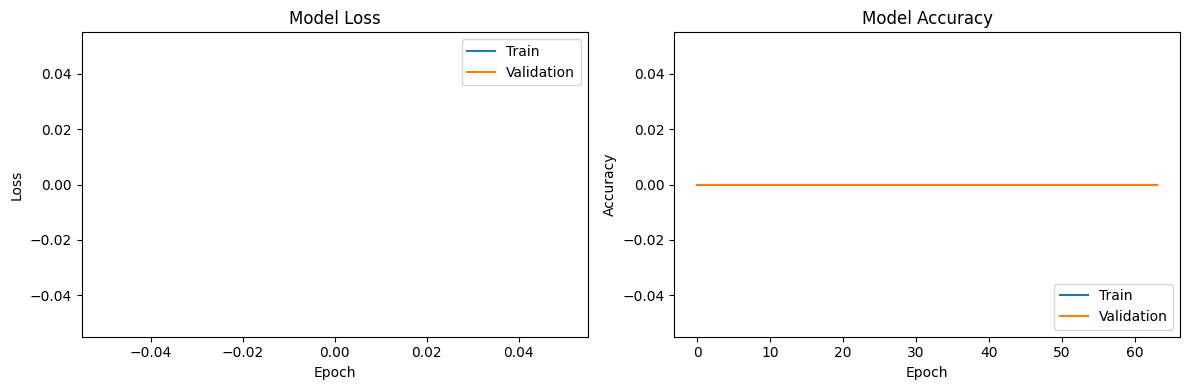

In [540]:
v_epochs = 100
v_batch_size = 64
v_test_size = 0.4
v_random_state = 50

# Define your input features and target variable
# Define your input features and target variable
X = gruposhh[['Flujos']]
y = gruposhh['Kp']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1, 1), y, test_size=v_test_size, random_state=v_random_state)


# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the ANN model
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Adjust the output layer based on your problem (e.g., regression or classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model with loss and accuracy tracking
history = model.fit(X_train, y_train, v_epochs, v_batch_size, validation_data=(X_test, y_test))

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot training loss and accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()

In [469]:
model.evaluate(X_test, y_test, verbose=2)

37/37 - 0s - loss: -1.1160e+01 - accuracy: 0.0000e+00 - 121ms/epoch - 3ms/step


[-11.159643173217773, 0.0]